<a href="https://colab.research.google.com/github/Nivyasunil/assignment-10-16/blob/main/Assignment_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from scipy.spatial import distance

In [ ]:
# Read train and test sets
train = pd.read_csv("trainKNN.txt", header=None)
train.columns = ['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
train = train.drop('ID', axis=1) # Drop ID since irrelevant to predictions
test = pd.read_csv('testKNN.txt', header=None)
test.columns=['ID', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type of glass']
test = test.drop('ID', axis=1)


In [ ]:
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
191,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
192,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
193,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
test

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
1,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
3,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
4,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
5,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
6,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
7,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
8,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
9,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [ ]:
train.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,1.518295,13.375204,2.758980,1.454337,72.635408,0.519388,8.910714,0.164235,0.050255,2.668367
std,0.003055,0.783145,1.392641,0.491688,0.763578,0.672703,1.421490,0.485198,0.086359,2.062416
min,1.511310,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516458,12.877500,2.362500,1.190000,72.317500,0.140000,8.220000,0.000000,0.000000,1.000000
50%,1.517630,13.280000,3.480000,1.360000,72.810000,0.560000,8.575000,0.000000,0.000000,2.000000
75%,1.518985,13.792500,3.610000,1.622500,73.080000,0.610000,9.092500,0.000000,0.090000,3.000000
max,1.533930,15.790000,4.490000,3.500000,75.180000,6.210000,16.190000,3.150000,0.340000,7.000000


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type of glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.4 KB


In [ ]:
train.shape

(196, 10)

In [ ]:
train.isnull().sum()

RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [ ]:
from scipy import stats

z = abs(stats.zscore(train))

#np.where(z > 3)

train = train[(z < 3).all(axis=1)]


In [ ]:
train

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
190,1.51732,14.95,0.00,1.80,72.99,0.00,8.61,1.55,0.0,7
191,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
193,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
194,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
features = ['RI','Na','Mg','Al','Si','K','Ca','Ba','Fe']
label = ['Type of glass']

X = train[features]

y = test[label]

In [ ]:
X.shape

(177, 9)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


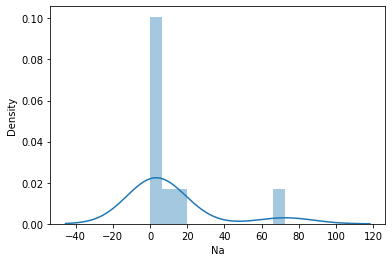

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


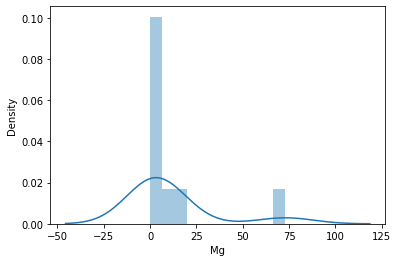

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


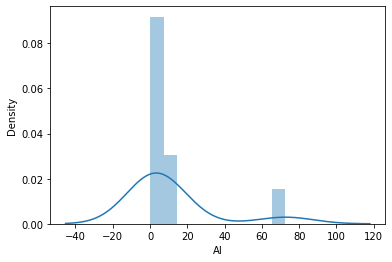

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


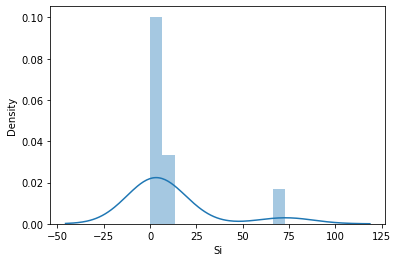

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


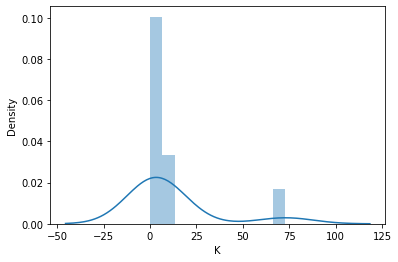

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


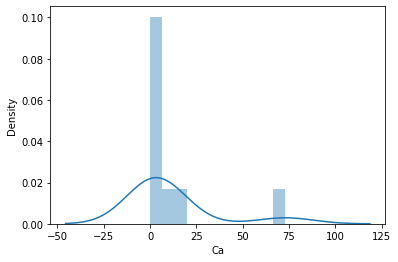

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


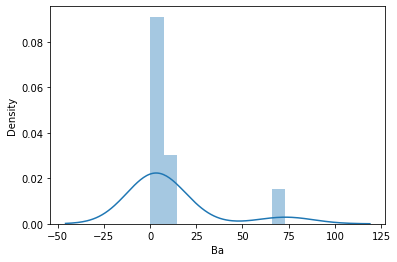

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


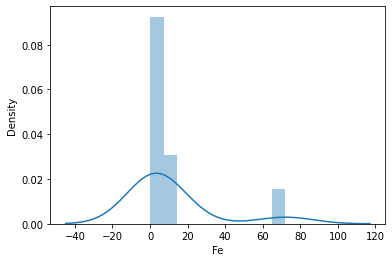

In [ ]:
x2 = X.values

from matplotlib import pyplot as plt
import seaborn as sns
for i in range(1,9):
        sns.distplot(x2[i])
        plt.xlabel(features[i])
        plt.show()

**Above diagrams shows that our dataset is skewed either on positive side or negative side and data is not normalized**

<Figure size 576x576 with 0 Axes>

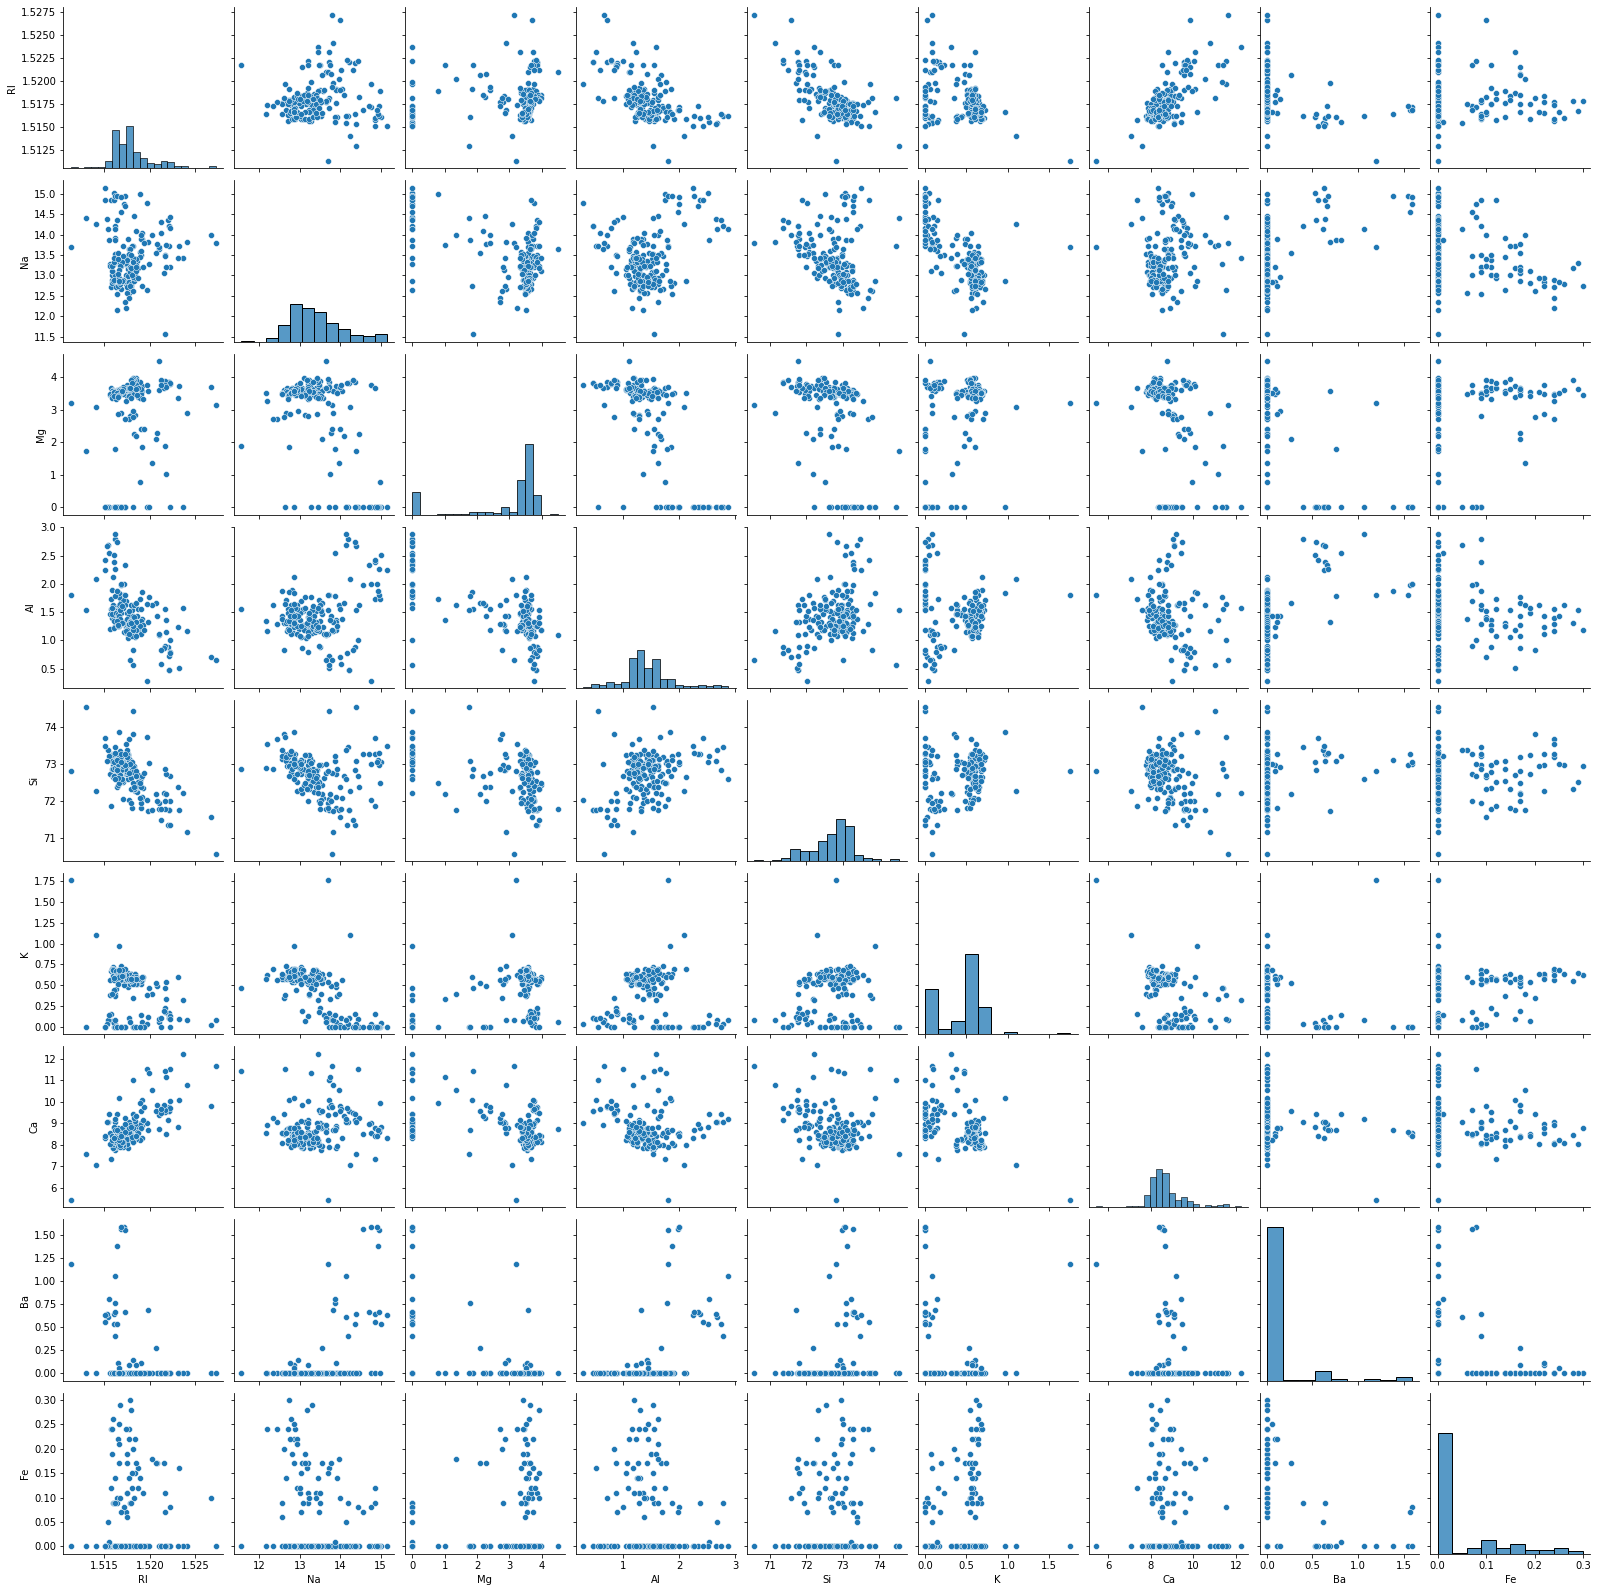

In [ ]:
x2 = pd.DataFrame(X)

plt.figure(figsize=(8,8))
sns.pairplot(data=x2)
plt.show()

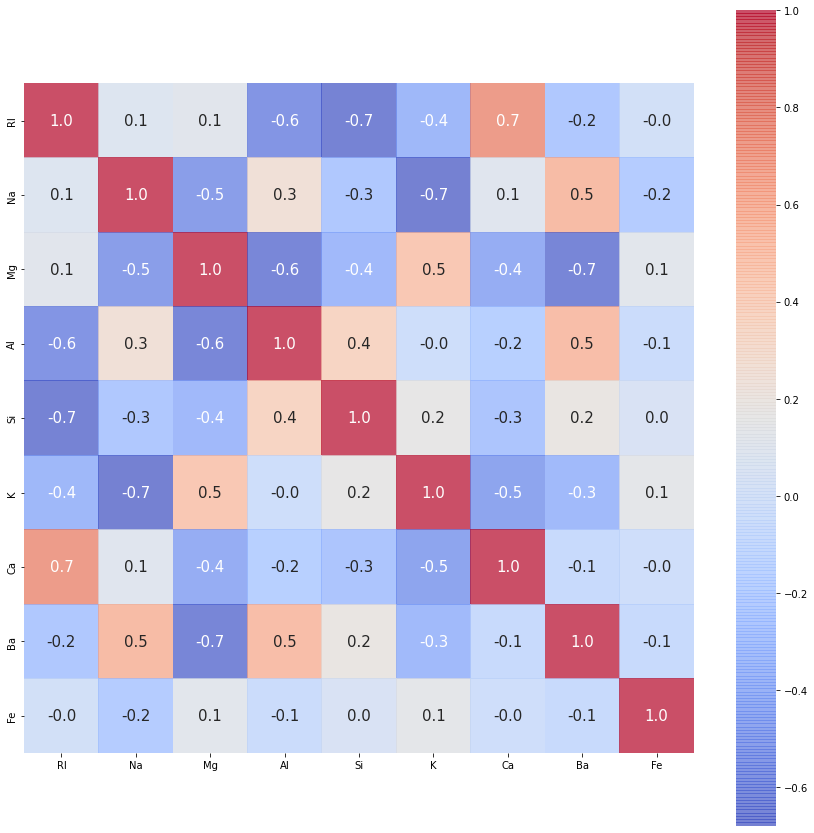

In [ ]:
coreleation= X.corr()
plt.figure(figsize=(15,15))
sns.heatmap(coreleation,cbar=True,square=True,annot=True,fmt='.1f',annot_kws={'size': 15},xticklabels=features,yticklabels=features,alpha=0.7,cmap= 'coolwarm')
plt.show()

Our Diagram shows correaltion between different features Conclusion:

RI and Ca have strong correlation between each other
AI and ba have intermediate correlation between each other **bold text****bold text**

In [ ]:
def standardize (df):
    for col in df.columns:
        if col != "Type of glass": # Don't standardize the categories
            df[col] = (df[col] - df[col].mean())/df[col].std()
    return df

In [ ]:
# Standardize data
train = standardize(train)
test = standardize(test)
train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.365179,0.340022,1.231007,-0.743729,-1.634722,-1.389525,-0.010583,-0.337366,-0.589293,1
1,-0.155195,0.719875,0.520649,-0.150756,0.008993,0.153607,-1.055015,-0.337366,-0.589293,1
2,-0.794647,0.172887,0.480742,0.259764,0.458852,-0.177064,-1.111778,-0.337366,-0.589293,1
3,-0.132837,-0.313325,0.592483,-0.310402,-0.198634,0.484279,-0.612267,-0.337366,-0.589293,1
4,-0.240157,-0.222160,0.536613,-0.424436,0.614573,0.410796,-0.782555,-0.337366,-0.589293,1


In [ ]:
# k = 8 neighbors
euclid_model = KNeighborsClassifier(n_neighbors=8, metric=distance.sqeuclidean) # Square Euclidean distance model
manhattan_model = KNeighborsClassifier(n_neighbors=8, metric=distance.cityblock) # Manhattan distance model
x_train = train.drop(["Type of glass"], axis=1)
y_train = train["Type of glass"]
euclid_model.fit(x_train,y_train) # Train models
manhattan_model.fit(x_train, y_train)
x_test = test.drop("Type of glass", axis=1) 
y_test = test["Type of glass"]

In [ ]:
# Make predictions
manhattan_predictions = manhattan_model.predict(x_test)
euclid_predictions = euclid_model.predict(x_test) 
df = pd.DataFrame({'actual': y_test, 'manhattan': manhattan_predictions, 'euclid': euclid_predictions})
df.head()

,actual,manhattan,euclid
0,1,2,2
1,1,2,2
2,1,1,1
3,2,2,2
4,2,2,1


In [ ]:
# Evaluate performance
manhattan_count = len(df.loc[df['manhattan'] == df['actual']])
euclid_count = len(df.loc[df['euclid'] == df['actual']])
print('Manhattan Accuracy: {}%'.format(round(100*manhattan_count/len(df), 2)))
print(classification_report(y_test, manhattan_predictions, target_names=df['actual'].astype(str).unique()))
print ('\n')
print('Square Euclidean Accuracy: {}%'.format(round(100*euclid_count/len(df), 2)))
print(classification_report(y_test, euclid_predictions, target_names=df['actual'].astype(str).unique()))

Manhattan Accuracy: 44.44%
              precision    recall  f1-score   support

           1       0.20      0.33      0.25         3
           2       0.25      0.67      0.36         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.67      0.80         3
           7       1.00      1.00      1.00         3

    accuracy                           0.44        18
   macro avg       0.41      0.44      0.40        18
weighted avg       0.41      0.44      0.40        18



Square Euclidean Accuracy: 33.33%
              precision    recall  f1-score   support

           1       0.17      0.33      0.22         3
           2       0.12      0.33      0.18         3
           3       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       1.00      0.33      0.50         3
           7       1.00      1.00      1.00         3

    accuracy  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat